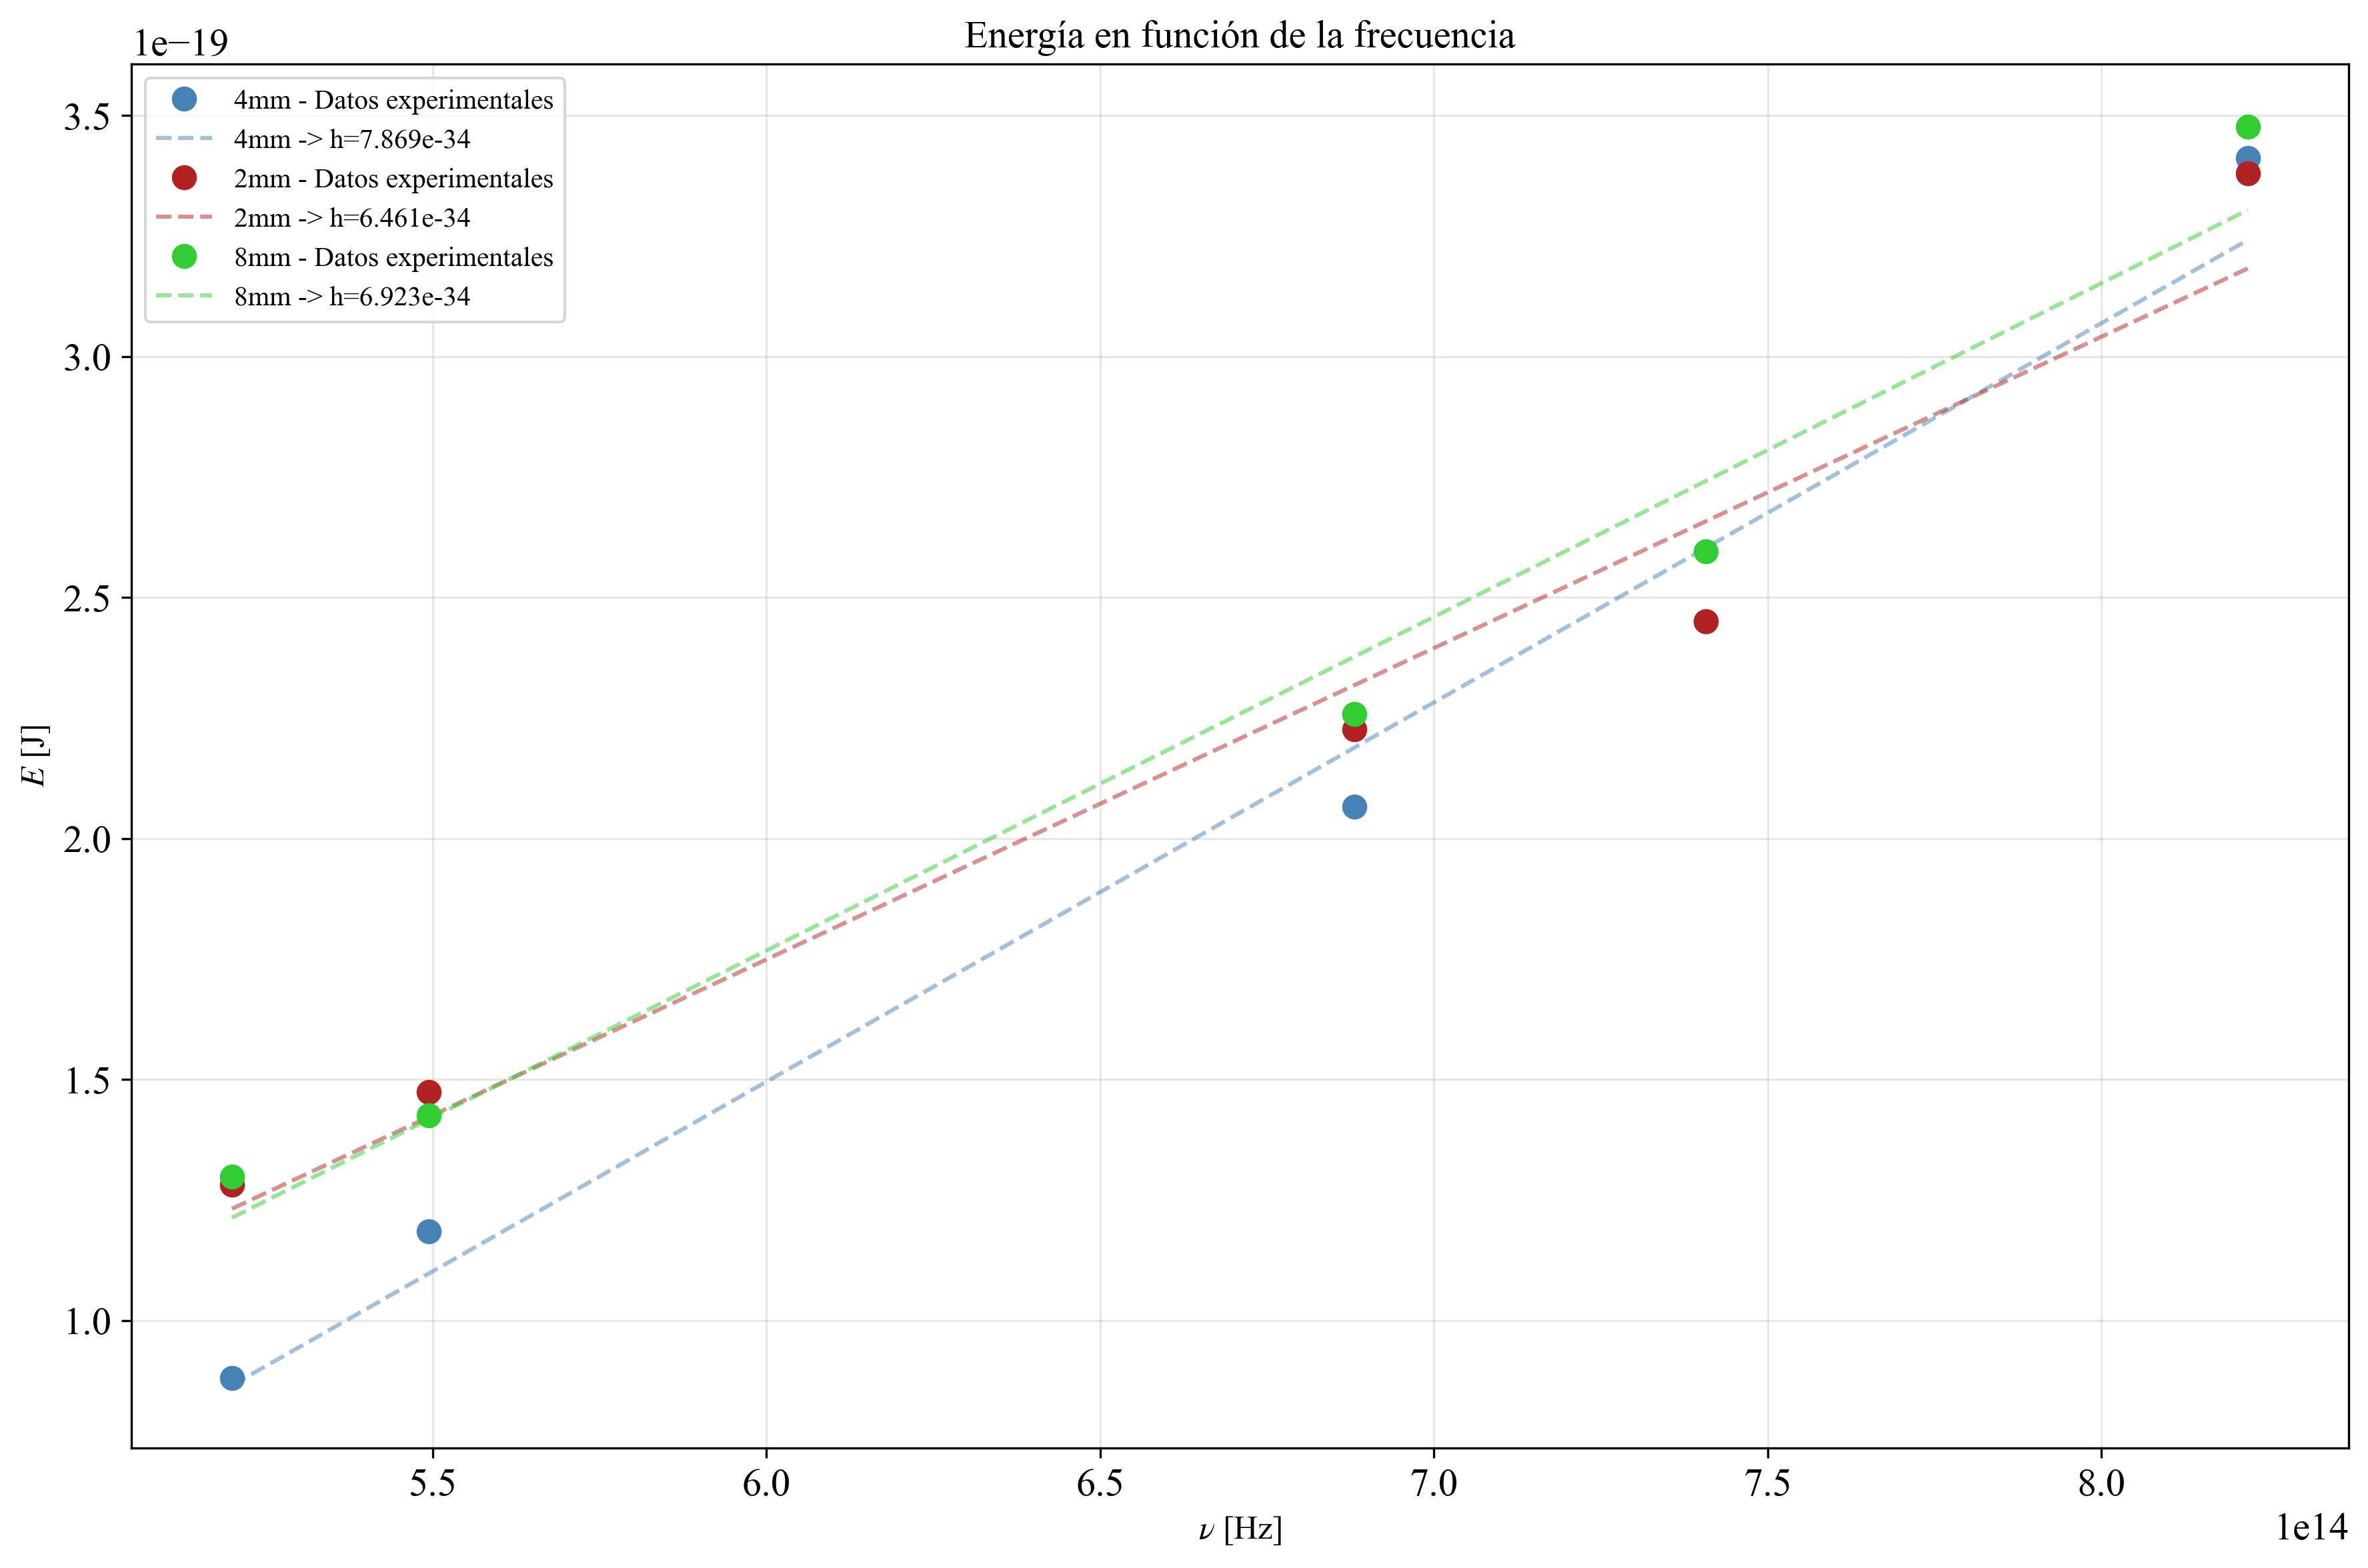

ANÁLISIS COMPARATIVO DEL EFECTO FOTOELÉCTRICO - TRES DISTANCIAS

4MM - RESULTADOS:
--------------------------------------------------
Constante de Planck experimental: 7.8693e-34 J·s
Error porcentual:                 18.76 %
Trabajo de extracción:            2.014 eV
Coeficiente R²:                   0.9818
Error estándar:                   6.1870e-35

2MM - RESULTADOS:
--------------------------------------------------
Constante de Planck experimental: 6.4608e-34 J·s
Error porcentual:                 2.49 %
Trabajo de extracción:            1.328 eV
Coeficiente R²:                   0.9662
Error estándar:                   6.9792e-35

8MM - RESULTADOS:
--------------------------------------------------
Constante de Planck experimental: 6.9235e-34 J·s
Error porcentual:                 4.49 %
Trabajo de extracción:            1.490 eV
Coeficiente R²:                   0.9774
Error estándar:                   6.0830e-35

RESULTADO FINAL Y ANÁLISIS DE ERRORES EXPERIMENTALES

VALOR TEÓRICO

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Constantes físicas
c = 3e8  # velocidad de la luz en m/s
e = 1.602e-19  # carga del electrón en C
h_teorico = 6.626e-34  # valor teórico de Planck en J·s

# Datos para 4mm
voltaje_4mm = np.array([-0.55, -0.74, -1.29, -1.53, -2.13]) #[V]
longitud_onda_m_4mm = np.array([5.77e-7, 5.46e-7, 4.36e-7, 4.05e-7, 3.65e-7]) # [m]

# Datos para 2mm
voltaje_2mm = np.array([-0.8, -0.92, -1.39, -1.53, -2.11]) #[V]
longitud_onda_m_2mm = np.array([5.77e-7, 5.46e-7, 4.36e-7, 4.05e-7, 3.65e-7])# [m]

# Datos para 8mm
voltaje_8mm = np.array([-0.81, -0.89, -1.41, -1.62, -2.17])#[V]
longitud_onda_m_8mm = np.array([5.77e-7, 5.46e-7, 4.36e-7, 4.05e-7, 3.65e-7])# [m]

def calcular_planck(voltaje, longitud_onda, distancia):
    """Calcula la constante de Planck para un conjunto de datos"""
    frecuencia = c / longitud_onda
    energia = e * np.abs(voltaje)

    # Ajuste lineal
    pendiente, intercepto, r_value, p_value, std_err = stats.linregress(frecuencia, energia)
    h_experimental = pendiente

    # Cálculo de errores
    error_absoluto = abs(h_experimental - h_teorico)
    error_porcentual = (error_absoluto / h_teorico) * 100

    # Trabajo de extracción
    trabajo_extraccion = -intercepto
    trabajo_extraccion_ev = trabajo_extraccion / e

    return {
        'distancia': distancia,
        'frecuencia': frecuencia,
        'energia': energia,
        'h_experimental': h_experimental,
        'intercepto': intercepto,
        'error_porcentual': error_porcentual,
        'r_cuadrado': r_value**2,
        'trabajo_extraccion_ev': trabajo_extraccion_ev,
        'pendiente': pendiente,
        'std_err': std_err
    }


# Calcular para las tres distancias
resultados_4mm = calcular_planck(voltaje_4mm, longitud_onda_m_4mm, "4mm")
resultados_2mm = calcular_planck(voltaje_2mm, longitud_onda_m_2mm, "2mm")
resultados_8mm = calcular_planck(voltaje_8mm, longitud_onda_m_8mm, "8mm")

# Lista de todos los resultados
todos_resultados = [resultados_4mm, resultados_2mm, resultados_8mm]
# Gráfico comparativo
plt.figure(figsize=(12, 8))

# Colores para cada distancia
colores = ['steelblue', 'firebrick', 'limegreen']
distancias = ['4mm', '2mm', '8mm']

for i, resultados in enumerate(todos_resultados):
    frecuencia = resultados['frecuencia']
    energia = resultados['energia']
    pendiente = resultados['pendiente']
    intercepto = resultados['intercepto']

    # Puntos experimentales
    plt.plot(frecuencia, energia, 'o', color=colores[i], markersize=8,
             label=f'{distancias[i]} - Datos experimentales')
    
    # Línea de ajuste
    freq_ajuste = np.linspace(min(frecuencia), max(frecuencia), 100)
    energia_ajuste = pendiente * freq_ajuste + intercepto
    plt.plot(freq_ajuste, energia_ajuste, '--', color=colores[i], linewidth=1.5,
             label=f'{distancias[i]} -> h={resultados["h_experimental"]:.3e}',alpha=0.5)

plt.xlabel(r'$\nu$ [Hz]', fontsize=12)
plt.ylabel(r'$E$ [J]', fontsize=12)
plt.title('Energía en función de la frecuencia', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
# Configuración de estilo para publicación científica

plt.show()

# Resultados detallados
print("=" * 80)
print("ANÁLISIS COMPARATIVO DEL EFECTO FOTOELÉCTRICO - TRES DISTANCIAS")
print("=" * 80)

# Mostrar resultados para cada distancia
for resultados in todos_resultados:
    print(f"\n{resultados['distancia'].upper()} - RESULTADOS:")
    print("-" * 50)
    print(f"Constante de Planck experimental: {resultados['h_experimental']:.4e} J·s")
    print(f"Error porcentual:                 {resultados['error_porcentual']:.2f} %")
    print(f"Trabajo de extracción:            {resultados['trabajo_extraccion_ev']:.3f} eV")
    print(f"Coeficiente R²:                   {resultados['r_cuadrado']:.4f}")
    print(f"Error estándar:                   {resultados['std_err']:.4e}")
# Cálculo del valor promedio y error experimental
h_valores = [r['h_experimental'] for r in todos_resultados]
errores_porcentuales = [r['error_porcentual'] for r in todos_resultados]

h_promedio = np.mean(h_valores)
error_promedio = np.mean(errores_porcentuales)
desviacion_estandar = np.std(h_valores)
error_relativo_promedio = (desviacion_estandar / h_promedio) * 100

print(f"\n" + "=" * 80)
print("RESULTADO FINAL Y ANÁLISIS DE ERRORES EXPERIMENTALES")
print("=" * 80)

print(f"\nVALOR TEÓRICO DE REFERENCIA:")
print(f"h = {h_teorico:.6e} J·s")

print(f"\nVALORES EXPERIMENTALES OBTENIDOS:")
for i, resultados in enumerate(todos_resultados):
    print(f"{distancias[i]}: h = {resultados['h_experimental']:.6e} J·s (Error: {resultados['error_porcentual']:.2f}%)")

print(f"\nANÁLISIS ESTADÍSTICO:")
print(f"Valor promedio de h:          {h_promedio:.6e} J·s")
print(f"Desviación estándar:          {desviacion_estandar:.6e} J·s")
print(f"Error porcentual promedio:    {error_promedio:.2f} %")
print(f"Error relativo entre medidas: {error_relativo_promedio:.2f} %")

print(f"\nPRECISIÓN EXPERIMENTAL:")
print(f"El experimento tiene una precisión promedio de {error_promedio:.2f}%")
print(f"La consistencia entre medidas es del {100-error_relativo_promedio:.2f}%")

# Tabla resumen final
print(f"\n" + "=" * 80)
print("TABLA RESUMEN FINAL")
print("=" * 80)
print(f"{'Distancia':<10} {'h_exp (J·s)':<15} {'Error %':<10} {'Φ (eV)':<10} {'R²':<8}")
print("-" * 80)
for resultados in todos_resultados:
    print(f"{resultados['distancia']:<10} {resultados['h_experimental']:.3e}  {resultados['error_porcentual']:<9.2f} {resultados['trabajo_extraccion_ev']:<9.3f} {resultados['r_cuadrado']:.4f}")

print(f"\nMEJOR ESTIMACIÓN EXPERIMENTAL:")
print(f"h = ({h_promedio:.3e} ± {desviacion_estandar:.3e}) J·s")
print(f"Precisión promedio: {error_promedio:.2f}% respecto al valor teórico")


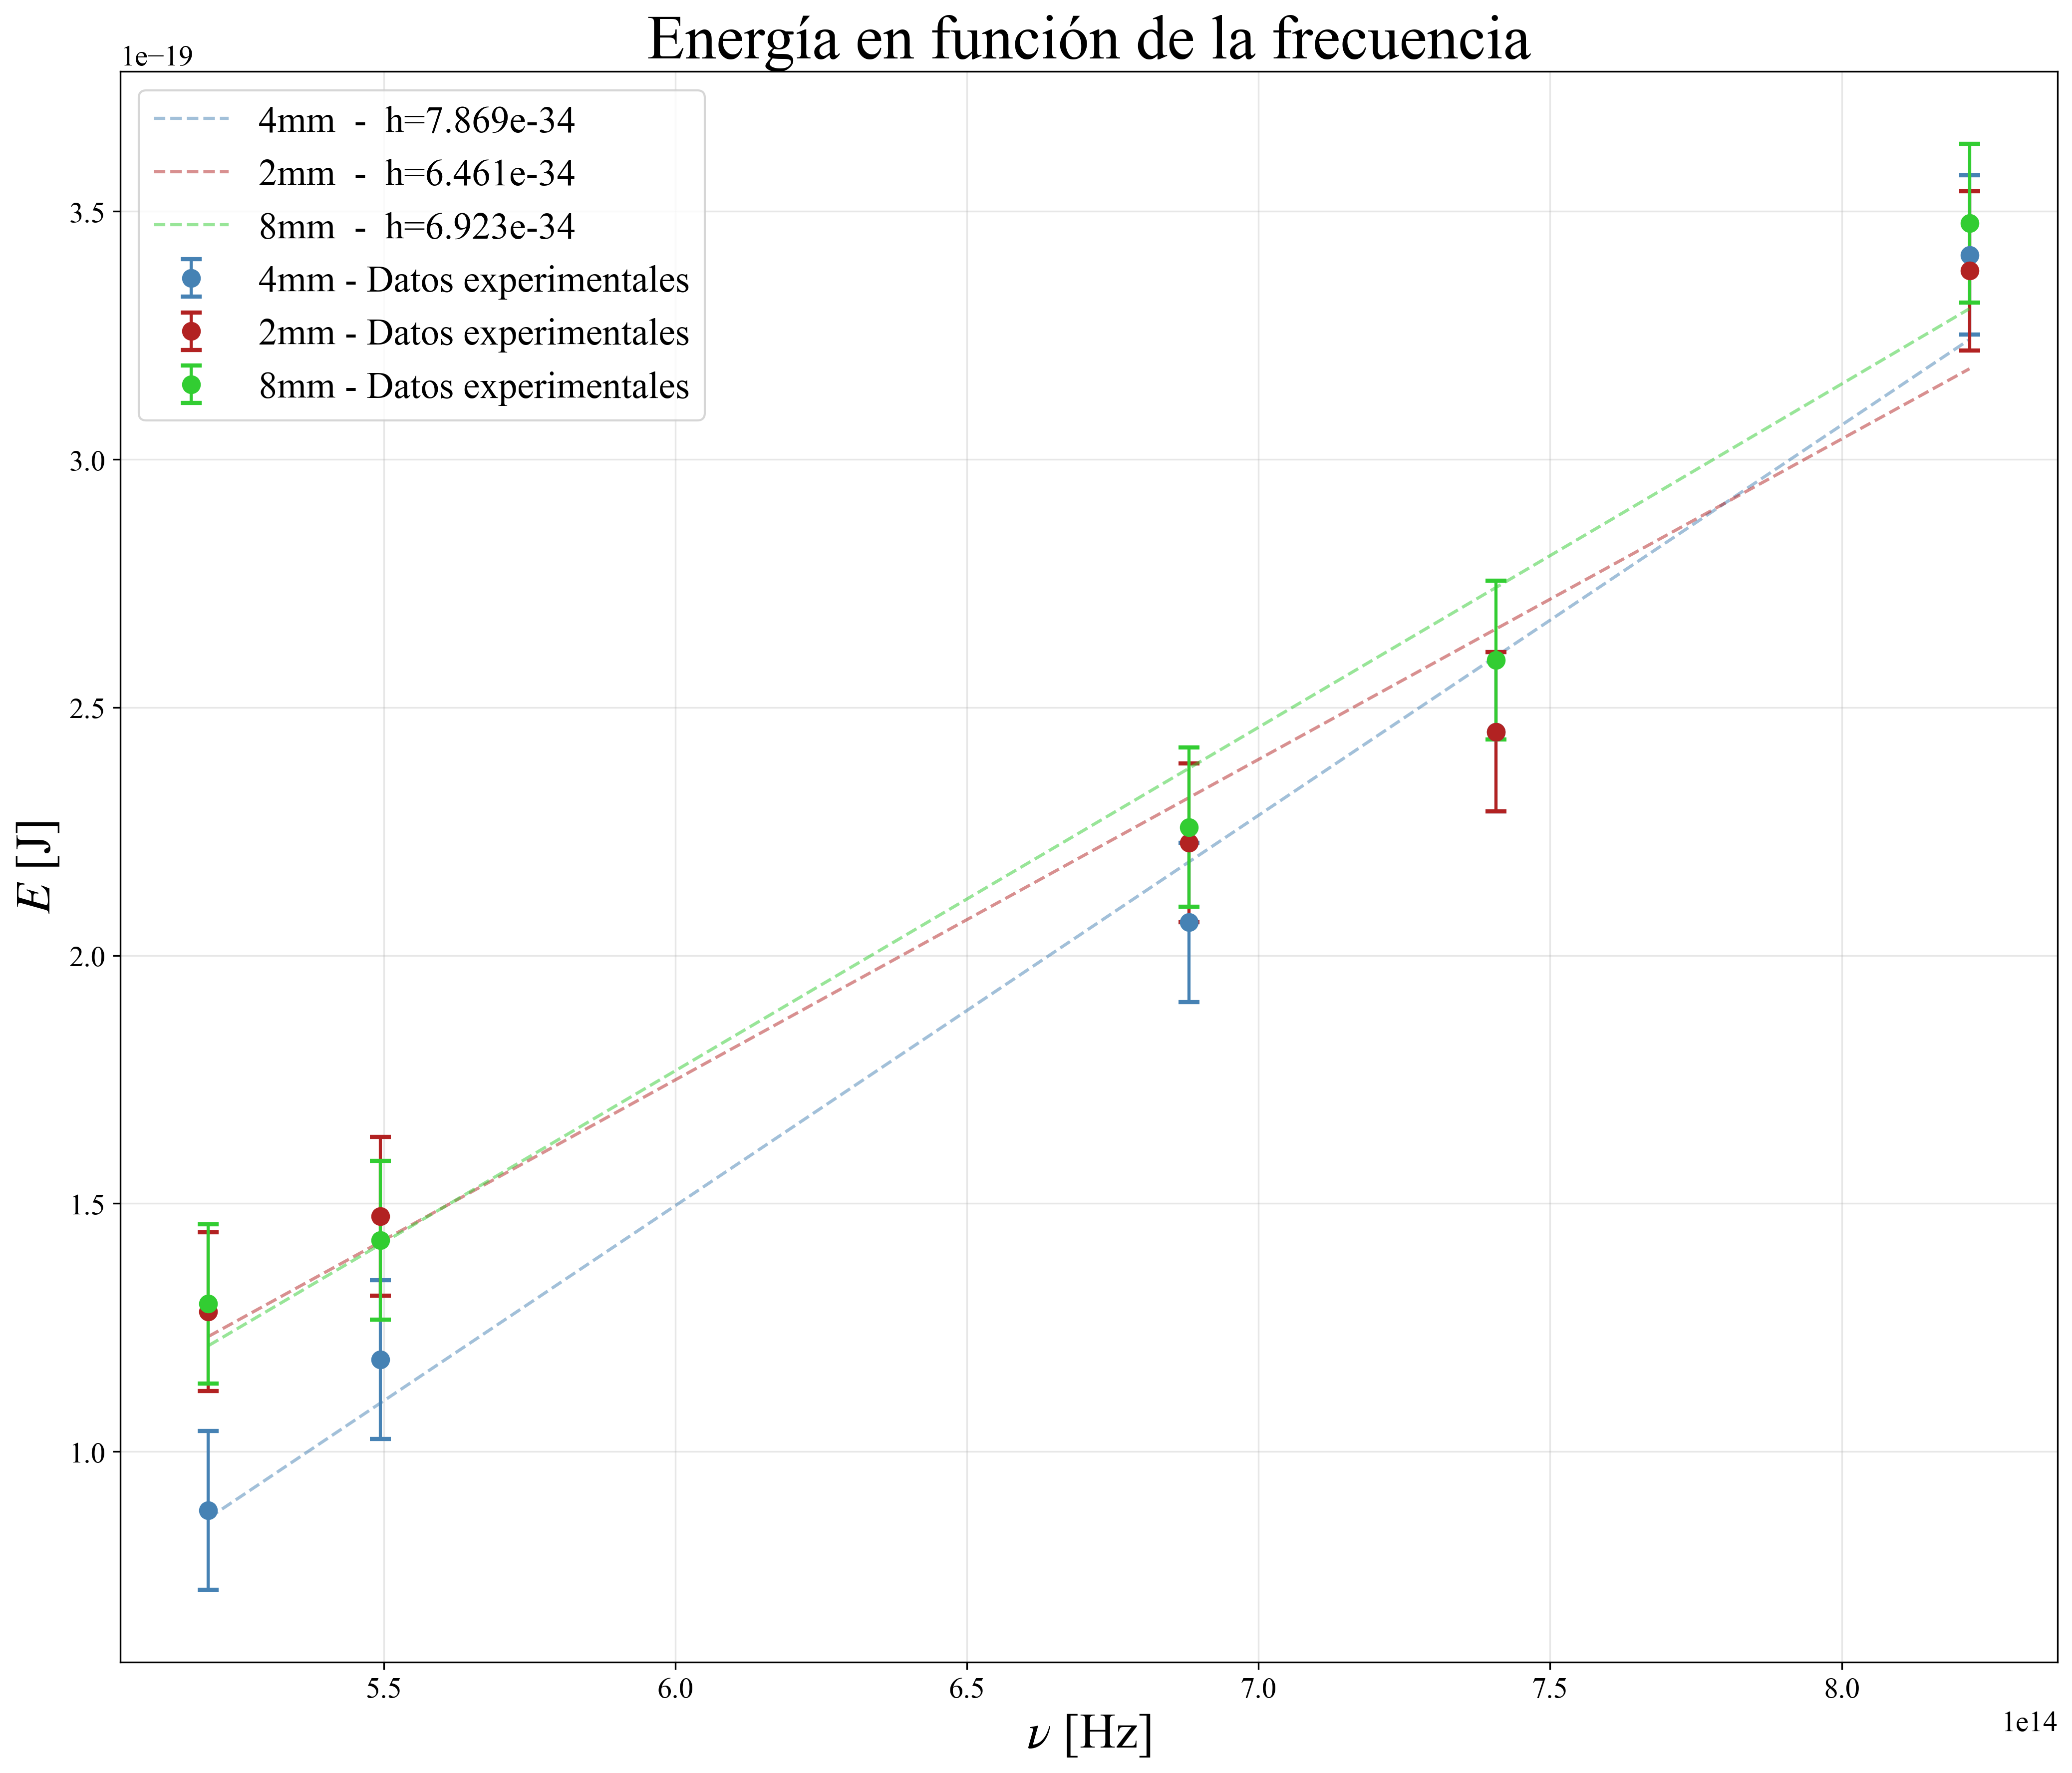

ANÁLISIS COMPARATIVO DEL EFECTO FOTOELÉCTRICO - TRES DISTANCIAS

4MM - RESULTADOS:
--------------------------------------------------
Constante de Planck experimental: 7.8693e-34 J·s
Error porcentual:                 18.76 %
Trabajo de extracción:            2.014 eV
Coeficiente R²:                   0.9818
Error estándar:                   6.1870e-35
Error en energía (ΔE):            1.6020e-20 J

2MM - RESULTADOS:
--------------------------------------------------
Constante de Planck experimental: 6.4608e-34 J·s
Error porcentual:                 2.49 %
Trabajo de extracción:            1.328 eV
Coeficiente R²:                   0.9662
Error estándar:                   6.9792e-35
Error en energía (ΔE):            1.6020e-20 J

8MM - RESULTADOS:
--------------------------------------------------
Constante de Planck experimental: 6.9235e-34 J·s
Error porcentual:                 4.49 %
Trabajo de extracción:            1.490 eV
Coeficiente R²:                   0.9774
Error estándar:    

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Constantes físicas
c = 3e8  # velocidad de la luz en m/s
e = 1.602e-19  # carga del electrón en C
h_teorico = 6.626e-34  # valor teórico de Planck en J·s

# Error de medición del voltaje
error_voltaje = 0.1  # V

# Datos para 4mm
voltaje_4mm = np.array([-0.55, -0.74, -1.29, -1.53, -2.13]) #[V]
longitud_onda_m_4mm = np.array([5.77e-7, 5.46e-7, 4.36e-7, 4.05e-7, 3.65e-7]) # [m]

# Datos para 2mm
voltaje_2mm = np.array([-0.8, -0.92, -1.39, -1.53, -2.11]) #[V]
longitud_onda_m_2mm = np.array([5.77e-7, 5.46e-7, 4.36e-7, 4.05e-7, 3.65e-7])# [m]

# Datos para 8mm
voltaje_8mm = np.array([-0.81, -0.89, -1.41, -1.62, -2.17])#[V]
longitud_onda_m_8mm = np.array([5.77e-7, 5.46e-7, 4.36e-7, 4.05e-7, 3.65e-7])# [m]

def calcular_planck(voltaje, longitud_onda, distancia):
    """Calcula la constante de Planck para un conjunto de datos"""
    frecuencia = c / longitud_onda
    energia = e * np.abs(voltaje)
    
    # Calcular error en la energía (propagación de error)
    error_energia = e * error_voltaje

    # Ajuste lineal
    pendiente, intercepto, r_value, p_value, std_err = stats.linregress(frecuencia, energia)
    h_experimental = pendiente

    # Cálculo de errores
    error_absoluto = abs(h_experimental - h_teorico)
    error_porcentual = (error_absoluto / h_teorico) * 100

    # Trabajo de extracción
    trabajo_extraccion = -intercepto
    trabajo_extraccion_ev = trabajo_extraccion / e

    return {
        'distancia': distancia,
        'frecuencia': frecuencia,
        'energia': energia,
        'error_energia': error_energia,
        'h_experimental': h_experimental,
        'intercepto': intercepto,
        'error_porcentual': error_porcentual,
        'r_cuadrado': r_value**2,
        'trabajo_extraccion_ev': trabajo_extraccion_ev,
        'pendiente': pendiente,
        'std_err': std_err
    }

# Calcular para las tres distancias
resultados_4mm = calcular_planck(voltaje_4mm, longitud_onda_m_4mm, "4mm")
resultados_2mm = calcular_planck(voltaje_2mm, longitud_onda_m_2mm, "2mm")
resultados_8mm = calcular_planck(voltaje_8mm, longitud_onda_m_8mm, "8mm")

# Lista de todos los resultados
todos_resultados = [resultados_4mm, resultados_2mm, resultados_8mm]

# Gráfico comparativo con barras de error
plt.figure(figsize=(14,12))

# Colores para cada distancia
colores = ['steelblue', 'firebrick', 'limegreen']
distancias = ['4mm', '2mm', '8mm']

for i, resultados in enumerate(todos_resultados):
    frecuencia = resultados['frecuencia']
    energia = resultados['energia']
    error_energia = resultados['error_energia']
    pendiente = resultados['pendiente']
    intercepto = resultados['intercepto']

    # Puntos experimentales con barras de error
    plt.errorbar(frecuencia, energia, yerr=error_energia, fmt='o', 
                 color=colores[i], markersize=8, capsize=5, capthick=2,
                 label=f'{distancias[i]} - Datos experimentales')
    
    # Línea de ajuste
    freq_ajuste = np.linspace(min(frecuencia), max(frecuencia), 100)
    energia_ajuste = pendiente * freq_ajuste + intercepto
    plt.plot(freq_ajuste, energia_ajuste, '--', color=colores[i], linewidth=1.5,
             label=f'{distancias[i]}  -  h={resultados["h_experimental"]:.3e}', alpha=0.5)

plt.xlabel(r'$\nu$ [Hz]', fontsize=24)
plt.ylabel(r'$E$ [J]', fontsize=24)
plt.title('Energía en función de la frecuencia', fontsize=30)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=18)
plt.tight_layout()

plt.show()

# Resultados detallados
print("=" * 80)
print("ANÁLISIS COMPARATIVO DEL EFECTO FOTOELÉCTRICO - TRES DISTANCIAS")
print("=" * 80)

# Mostrar resultados para cada distancia
for resultados in todos_resultados:
    print(f"\n{resultados['distancia'].upper()} - RESULTADOS:")
    print("-" * 50)
    print(f"Constante de Planck experimental: {resultados['h_experimental']:.4e} J·s")
    print(f"Error porcentual:                 {resultados['error_porcentual']:.2f} %")
    print(f"Trabajo de extracción:            {resultados['trabajo_extraccion_ev']:.3f} eV")
    print(f"Coeficiente R²:                   {resultados['r_cuadrado']:.4f}")
    print(f"Error estándar:                   {resultados['std_err']:.4e}")
    print(f"Error en energía (ΔE):            {resultados['error_energia']:.4e} J")

# Cálculo del valor promedio y error experimental
h_valores = [r['h_experimental'] for r in todos_resultados]
errores_porcentuales = [r['error_porcentual'] for r in todos_resultados]

h_promedio = np.mean(h_valores)
error_promedio = np.mean(errores_porcentuales)
desviacion_estandar = np.std(h_valores)
error_relativo_promedio = (desviacion_estandar / h_promedio) * 100

print(f"\n" + "=" * 80)
print("RESULTADO FINAL Y ANÁLISIS DE ERRORES EXPERIMENTALES")
print("=" * 80)

print(f"\nVALOR TEÓRICO DE REFERENCIA:")
print(f"h = {h_teorico:.6e} J·s")

print(f"\nVALORES EXPERIMENTALES OBTENIDOS:")
for i, resultados in enumerate(todos_resultados):
    print(f"{distancias[i]}: h = {resultados['h_experimental']:.6e} J·s (Error: {resultados['error_porcentual']:.2f}%)")

print(f"\nANÁLISIS ESTADÍSTICO:")
print(f"Valor promedio de h:          {h_promedio:.6e} J·s")
print(f"Desviación estándar:          {desviacion_estandar:.6e} J·s")
print(f"Error porcentual promedio:    {error_promedio:.2f} %")
print(f"Error relativo entre medidas: {error_relativo_promedio:.2f} %")

print(f"\nPRECISIÓN EXPERIMENTAL:")
print(f"El experimento tiene una precisión promedio de {error_promedio:.2f}%")
print(f"La consistencia entre medidas es del {100-error_relativo_promedio:.2f}%")

# Tabla resumen final
print(f"\n" + "=" * 80)
print("TABLA RESUMEN FINAL")
print("=" * 80)
print(f"{'Distancia':<10} {'h_exp (J·s)':<15} {'Error %':<10} {'Φ (eV)':<10} {'R²':<8}")
print("-" * 80)
for resultados in todos_resultados:
    print(f"{resultados['distancia']:<10} {resultados['h_experimental']:.3e}  {resultados['error_porcentual']:<9.2f} {resultados['trabajo_extraccion_ev']:<9.3f} {resultados['r_cuadrado']:.4f}")

print(f"\nMEJOR ESTIMACIÓN EXPERIMENTAL:")
print(f"h = ({h_promedio:.3e} ± {desviacion_estandar:.3e}) J·s")
print(f"Precisión promedio: {error_promedio:.2f}% respecto al valor teórico")
print(f"Error de medición del voltaje: ±{error_voltaje} V")
print(f"Error propagado en energía: ±{resultados_4mm['error_energia']:.3e} J")